##### Author contributions
Please fill out for each of the following parts who contributed to what:
- Conceived ideas: Ajinkya, Miriam, Peter, Nienke
- Performed math exercises: Miriam, Peter, Nienke, Ajinkya
- Performed programming exercises: Peter, Nienke, Ajinkya, Miriam
- Contributed to the overall final assignment: Nienke, Ajinkya, Miriam, Peter

# Chapter 2
## The perceptron

Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Brightspace before the deadline (see Brightspace).
    
Learning goals:
1. Implement a perceptron. 

In [0]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 1: The activation function (1 point)
The perceptron uses the *linear threshold activation* function $g(\mathbf{x})$ with $\theta=0$. Write a function ```linear_threshold(x, theta)``` that computes this activation given any input $x$.

### Solution 1

In [0]:
# The activation function
def linear_threshold(x, theta=0):
  """
  @description:
    function to compute linear threshold activation function g(x) 
    with theta = 0 (default).
  @arguments: 
    x (ndarray) - input vector
    theta (float) - theta angle
  @returns:
    g (ndarray) - linear threshold function output vector
  """
  # create a boolean array based on threshold value theta
  threshold_mask = x > theta
  # compute linear threshold function output by converting boolean array to 
  # float array
  return threshold_mask.astype(float)

### Exercise 2: Perceptron output (1 point)
The output $y$ of a perceptron is given by $y=g(\mathbf{w}^\top \mathbf{x})$, with input vector $\mathbf{x}$, the weight vector $\mathbf{w}$, and the activation function $g$. Write a function ```compute_output(x,w)``` that computes the output of a perceptron, given a single pattern $\mathbf{x}$ and the current perceptron weights $\mathbf{w}$.

### Solution 2

In [0]:
# Output of a perceptron
def compute_output(x,w):
  """
  @description:
    function to compute output of a perceptron: y = g(wT.x)
  @arguments:
    x (ndarray) - input vector
    w (ndarray) - weights vector
  @returns:
    (ndarray) - perceptron output vector
  """
  # compute activation function output
  dot_prod = np.dot(w.T, x) 
  # return perceptron output
  return linear_threshold(dot_prod)

### Exercise 3: Weight update (1 point)
A perceptron is trained (i.e. it learns the right weights) following the perceptron convergence procedure. Write a function ```update_weights(w, x, y, t)``` that performs this procedure. Specifically, write a function that returns the updated perceptron weights following the rule from the lecture, given one input pattern $\mathbf{x}$, its target output $\mathbf{t}$, the current set of weights $\mathbf{w}$ and the (already calculated) output of the perceptron $\mathbf{y}$. 

You don't need to calculate the perceptron output $\mathbf{y}$ here, it will be calculated in the final perceptron training function with your ```compute_output()``` function. 

Hint: This is a very short function again. 

### Solution 3

In [0]:
# Perceptron weight update
def update_weights(w, x, y, t):
  """
  @description:
    function to update weights of a perceptron using the perceptron convergence 
    procedure.
  @arguments:
    w (ndarray) : weight vector
    x (ndarray) : input vector
    y (ndarray) : perceptron output vector
    t (ndarray) : target vector
  @returns:
    (ndarray) : updated weight vector
  """
  # compute error ndarray between t and y
  err = t - y
  # compute weight change
  delta = err * x
  # return updated weight vector
  return w + delta

### Exercise 4: Training (1.5 points)
You now have implemented all the building blocks for a perceptron. Now, write a function ```perceptron_train(X, T, n_epochs)``` that trains and returns weights $\mathbf{w}$ for a perceptron, given a dataset $\mathbf{X}$ and targets $\mathbf{T}$.

`n` is the number of training examples. `m` is the number of weights. Expect $\mathbf{X}$ to be a matrix containing the training examples with dimensions `(m,n)` and $\mathbf{T}$ containing the targets for each example, a vector with length `n`.

It should train for 10 epochs (iterations over all training examples). Make use of `np.random.permutation` to avoid that you are always iterating over the examples in the same order. 

For now only implement ```perceptron_train(X, T, n_epochs)```. We will call and test it later. 

### Solution 4

In [0]:
def perceptron_train(X, T, n_epochs=10):
    m, n = X.shape

    # Initialize the right number of weights as zeros
    w = np.zeros((m, ))

    # Loop over epochs
    for ep in range(n_epochs):

      # Loop over all examples in random order
      for idx in np.random.permutation(n):
        # Take an example
        x = X[:,idx]
        # Compute the output of the perceptron
        y = compute_output(x, w)

        # Update the weights of the perceptron
        w = update_weights(w, x, y, T[idx])

    return w

### Exercise 5: Testing (1.5 points)
In addition to the training function, write a function `perceptron_test(X,w)` that computes and returns the outputs $\mathbf{Y}$ for a given dataset $\mathbf{X}$ and a perceptron given by its weights $\mathbf{w}$. 

### Solution 5

In [0]:
def perceptron_test(X, w):
    m,n = X.shape
    
    # Create an output array Y that you use to store the perceptron outputs
    Y = np.zeros((n,))

    # Loop over the examples
    for idx in range(n):

      # Take an example
      x = X[:,idx]

      # Compute the output of the perceptron
      Y[idx] = compute_output(x, w)

    return Y

### Exercise 6: OR (1 point)
Use your functions to train and test a perceptron on the OR problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs $\mathbf{T}$ for the OR problem  to check whether your perceptron has learned successfully. 

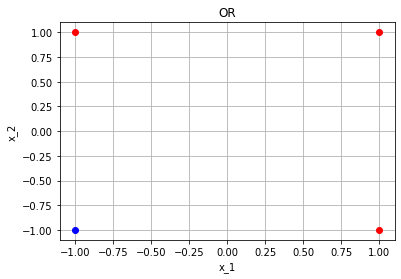

In [0]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 1, 1, 1], dtype="float32")

# Plot data
plt.figure()
for i in range(X.shape[1]):
    if T[i] == 1:
        plt.plot(X[0, i], X[1, i], "or")
    else:
        plt.plot(X[0, i], X[1, i], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("OR")
plt.grid(True)
plt.show()

# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 6

In [0]:
# Train the perceptron
w = perceptron_train(X, T, n_epochs=100)

# Apply the perceptron
Y = perceptron_test(X, w)

# Print predictions and targets
print("Targets: {}".format(T))
print("Predictions: {}".format(Y))

Targets: [0. 1. 1. 1.]
Predictions: [0. 1. 1. 1.]


### Exercise 7: AND (1 point)
Train and test your perceptron on the AND problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs for the AND problem $\mathbf{T}$ to check whether your perceptron has learned successfully. 

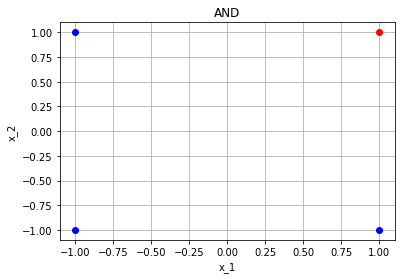

In [0]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 0, 0, 1], dtype="float32")

# Plot data
plt.figure()
for i in range(X.shape[1]):
    if T[i] == 1:
        plt.plot(X[0, i], X[1, i], "or")
    else:
        plt.plot(X[0, i], X[1, i], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("AND")
plt.grid(True)
plt.show()

# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 7

In [0]:
# Train the perceptron
w = perceptron_train(X, T, n_epochs=100)

# Apply the perceptron
Y = perceptron_test(X, w)

# Print predictions and targets
print("Targets: {}".format(T))
print("Predictions: {}".format(Y))

Targets: [0. 0. 0. 1.]
Predictions: [0. 0. 0. 1.]


### Exercise 8: XOR (1 point)
Train and test your perceptron on the XOR problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs for the XOR problem $\mathbf{T}$ to check whether your perceptron has learned successfully. 

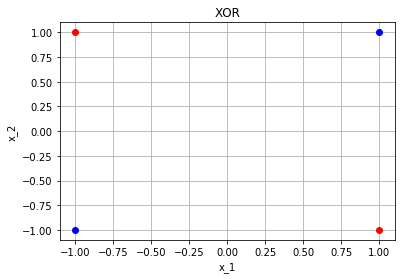

In [0]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 1, 1, 0], dtype="float32")

# Plot data
plt.figure()
for i in range(X.shape[1]):
    if T[i] == 1:
        plt.plot(X[0, i], X[1, i], "or")
    else:
        plt.plot(X[0, i], X[1, i], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("XOR")
plt.grid(True)
plt.show()

# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 8

In [0]:
# Train the perceptron
w = perceptron_train(X, T, n_epochs=100)

# Apply the perceptron
Y = perceptron_test(X, w)

# Print predictions and targets
print("Targets: {}".format(T))
print("Predictions: {}".format(Y))

Targets: [0. 1. 1. 0.]
Predictions: [0. 0. 0. 0.]


### Exercise 9: Interpretation (1 point)

1. Which of the three problems OR, AND and XOR did the perceptron learn, and which did it not learn?
1. Which property do the patterns in $\mathbf{X}$ need to have so that the perceptron can learn them? 
1. Which of the three problems do or do not have this property?

### Solution 9

1. The perceptron learned the OR and AND case, but not the XOR case. 
1. Linear separability. This means that we can draw one linear (i.e. straight) line that can separate the two classes.
1. The XOR does not have this property. We need some non-linear line two separate the two classes. 